In [7]:
pip install shapely geopy pandas openpyxl

In [8]:
pip install opencv-python

Drawing boundaries using contour detection

In [3]:
import cv2
import numpy as np

# Load the image
image_path = '/content/forest.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a list of color ranges in HSV for segmentation
color_ranges = [
    ((35, 50, 50), (85, 255, 255)),  # Green
    ((25, 50, 50), (35, 255, 255)),  # Yellow
    ((0, 50, 50), (10, 255, 255)),   # Red
    ((130, 50, 50), (170, 255, 255)) # Purple
]

# Create an empty image to draw contours
contour_image = np.zeros_like(image)

for lower, upper in color_ranges:
    # Create masks for each color range
    mask = cv2.inRange(hsv_image, np.array(lower), np.array(upper))

    # Find contours
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the empty image
    cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 1)

# Invert the colors of the contour image
contour_image = cv2.bitwise_not(contour_image)

# Save or display the result
output_path = 'inverted_contour_image.png'
cv2.imwrite(output_path, contour_image)
# cv2.imshow('Inverted Contour Image', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

# Load the image
image_path = '/content/boundary.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color ranges for blue and red in HSV
blue_lower = np.array([100, 150, 0])
blue_upper = np.array([140, 255, 255])
red_lower1 = np.array([0, 70, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 70, 50])
red_upper2 = np.array([180, 255, 255])

# Create masks for blue and red colors
blue_mask = cv2.inRange(hsv_image, blue_lower, blue_upper)
red_mask1 = cv2.inRange(hsv_image, red_lower1, red_upper1)
red_mask2 = cv2.inRange(hsv_image, red_lower2, red_upper2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Combine blue and red masks
combined_mask = cv2.bitwise_or(blue_mask, red_mask)

# Create an output image with a white background
output_image = np.ones_like(image) * 255

# Copy the blue border and red dots onto the white background
output_image[combined_mask > 0] = image[combined_mask > 0]

# Save or display the result
output_path = 'output_image.png'
cv2.imwrite(output_path, output_image)
# cv2.imshow('Output Image', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Image overlay

In [6]:
import cv2
import numpy as np

# Load the images
img1_path = '/content/output_image.png'  # Path to the base image
img2_path = '/content/inverted_contour_image.png'  # Path to the border image

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Ensure img2 is the same size as img1, resize if necessary
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Convert img2 to grayscale
gray_img2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

# Create a mask from img2 (black lines will be 255, everything else will be 0)
_, mask = cv2.threshold(gray_img2, 1, 255, cv2.THRESH_BINARY_INV)

# Invert the mask to get black lines as 255
mask_inv = cv2.bitwise_not(mask)

# Convert the mask to 3 channels
mask_inv_colored = cv2.cvtColor(mask_inv, cv2.COLOR_GRAY2BGR)

# Overlay the mask onto img1
result = cv2.bitwise_and(img1, mask_inv_colored)
result += cv2.bitwise_and(img2_resized, cv2.bitwise_not(mask_inv_colored))

# Save or display the result
output_path = 'overlay_image.png'
cv2.imwrite(output_path, result)
# cv2.imshow('Overlay Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Plotting the coordinates to get the area of interest

In [ ]:
import pandas as pd

# List of coordinates
coordinates = [
    (24.613149333805474, 79.94064280142537), (24.616585992854144, 79.94991726200432),
    (24.612216089309918, 79.94133064867492), (24.607228943711352, 79.9334415497031),
    (24.60131139733483, 79.92761672921684), (24.591655781843432, 79.92042195805622),
    (24.587299304823453, 79.92178768981881), (24.58576436277328, 79.92791946493091),
    (24.586381164759292, 79.94022706390288), (24.588248167477843, 79.94807089028068),
    (24.587628286896656, 79.94738280901824), (24.588864604296962, 79.95662606790627),
    (24.59227905016377, 79.96382008850203), (24.59600792543035, 79.9669020018246),
    (24.59693461968274, 79.98161047168524), (24.601285711509487, 79.99261919911497),
    (24.600036164603583, 79.99666187086699), (24.602206137061415, 80.00795204970156),
    (24.60220551851527, 80.00897837892957), (24.604378142850607, 80.01513798953346),
    (24.603130357957237, 80.02129571553036), (24.60344082430387, 80.02198023870692),
    (24.60748476357962, 80.01924582085627), (24.610592334219916, 80.02198585337489),
    (24.614944579481193, 80.02370190445916), (24.61991956507346, 80.02439225088594),
    (24.626172869319458, 80.02109251986653), (24.63647935781835, 80.00952122340946),
    (24.63773249331087, 80.00542030955219), (24.643322656810316, 80.0091641734615),
    (24.64611463012587, 80.01188943429752), (24.65108746230968, 80.00810509530949),
    (24.652034788862203, 80.00229881543169), (24.649268878188455, 79.9917222293751),
    (24.64493823977292, 79.98559124693645), (24.641527124342648, 79.98184114549959),
    (24.639403414224603, 79.97196610986329), (24.634432860124583, 79.95652951466646),
    (24.629970355168926, 79.95127085050233), (24.623754749787306, 79.94957512077103),
    (24.616586124513557, 79.95026054402153)
]

# Create DataFrame
df = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

# Display DataFrame
print(df)


     Latitude  Longitude
0   24.613149  79.940643
1   24.616586  79.949917
2   24.612216  79.941331
3   24.607229  79.933442
4   24.601311  79.927617
5   24.591656  79.920422
6   24.587299  79.921788
7   24.585764  79.927919
8   24.586381  79.940227
9   24.588248  79.948071
10  24.587628  79.947383
11  24.588865  79.956626
12  24.592279  79.963820
13  24.596008  79.966902
14  24.596935  79.981610
15  24.601286  79.992619
16  24.600036  79.996662
17  24.602206  80.007952
18  24.602206  80.008978
19  24.604378  80.015138
20  24.603130  80.021296
21  24.603441  80.021980
22  24.607485  80.019246
23  24.610592  80.021986
24  24.614945  80.023702
25  24.619920  80.024392
26  24.626173  80.021093
27  24.636479  80.009521
28  24.637732  80.005420
29  24.643323  80.009164
30  24.646115  80.011889
31  24.651087  80.008105
32  24.652035  80.002299
33  24.649269  79.991722
34  24.644938  79.985591
35  24.641527  79.981841
36  24.639403  79.971966
37  24.634433  79.956530
38  24.629970  79.951271


In [ ]:
len(df)

41

In [ ]:
import folium
import pandas as pd
from shapely.geometry import Point, Polygon
from geopy.distance import geodesic

In [ ]:
# Define your bounding box as a list of (latitude, longitude) tuples
bounding_box =[(24.613149333805474, 79.94064280142537),(24.616585992854144, 79.94991726200432),(24.612216089309918, 79.94133064867492),(24.607228943711352, 79.9334415497031)
,(24.60131139733483, 79.92761672921684),(24.591655781843432, 79.92042195805622),(24.587299304823453, 79.92178768981881),(24.58576436277328, 79.92791946493091)
,(24.586381164759292, 79.94022706390288),(24.588248167477843, 79.94807089028068),(24.587628286896656, 79.94738280901824),(24.588864604296962, 79.95662606790627)
,(24.59227905016377, 79.96382008850203),(24.59600792543035, 79.9669020018246),(24.59693461968274, 79.98161047168524),(24.601285711509487, 79.99261919911497)
,(24.600036164603583, 79.99666187086699),(24.602206137061415, 80.00795204970156),(24.60220551851527, 80.00897837892957),(24.604378142850607, 80.01513798953346)
,(24.603130357957237, 80.02129571553036),(24.60344082430387, 80.02198023870692),(24.60748476357962, 80.01924582085627),(24.610592334219916, 80.02198585337489)
,(24.614944579481193, 80.02370190445916),(24.61991956507346, 80.02439225088594),(24.626172869319458, 80.02109251986653),(24.63647935781835, 80.00952122340946)
,(24.63773249331087, 80.00542030955219),(24.643322656810316, 80.0091641734615),(24.64611463012587, 80.01188943429752),(24.65108746230968, 80.00810509530949)
,(24.652034788862203, 80.00229881543169),(24.649268878188455, 79.9917222293751),(24.64493823977292, 79.98559124693645),(24.641527124342648, 79.98184114549959)
,(24.639403414224603, 79.97196610986329),(24.634432860124583, 79.95652951466646),(24.629970355168926, 79.95127085050233),(24.623754749787306, 79.94957512077103)
,(24.616586124513557, 79.95026054402153)]

In [ ]:
bounding_box = [
    [24.431, 79.937], [24.437, 79.943], [24.442, 79.948], [24.447, 79.951], [24.452, 79.956],
    [24.456, 79.961], [24.461, 79.964], [24.466, 79.968], [24.470, 79.972], [24.474, 79.976],
    [24.479, 79.980], [24.484, 79.984], [24.488, 79.988], [24.492, 79.992], [24.496, 79.996],
    [24.501, 80.000], [24.506, 80.004], [24.510, 80.008], [24.515, 80.012], [24.519, 80.016],
    [24.523, 80.020], [24.527, 80.024], [24.532, 80.028], [24.536, 80.032], [24.540, 80.036],
    [24.545, 80.040], [24.549, 80.044], [24.554, 80.048], [24.558, 80.052], [24.562, 80.056]
]

In [ ]:
# Create a polygon from the bounding box
polygon = Polygon(bounding_box)

# Function to generate points within the polygon
def generate_points_within_polygon(polygon, distance_km):
    min_x, min_y, max_x, max_y = polygon.bounds
    points = []
    lat = min_y
    while lat < max_y:
        lon = min_x
        while lon < max_x:
            point = Point(lon, lat)
            if polygon.contains(point):
                points.append((lat, lon))
            # Move 5km in the longitude direction
            lon = geodesic(kilometers=distance_km).destination((lat, lon), 90).longitude
        # Move 5km in the latitude direction
        lat = geodesic(kilometers=distance_km).destination((lat, min_x), 0).latitude
    return points

# Generate the points
points = generate_points_within_polygon(polygon, 0.1)

# Create a DataFrame
df = pd.DataFrame(points, columns=['Longitude', 'Latitude'])

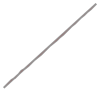

In [ ]:
polygon

In [ ]:
len(df)

14

In [ ]:
df=df[['Latitude','Longitude']]

In [ ]:
# Create a folium map centered around the bounding box
center_lat = sum([point[0] for point in bounding_box]) / len(bounding_box)
center_lon = sum([point[1] for point in bounding_box]) / len(bounding_box)
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add the boundary to the map
folium.PolyLine(bounding_box, color="blue", weight=2.5, opacity=1).add_to(m)

# Add the points to the map
for lat, lon in df.itertuples(index=False):
    folium.CircleMarker(
        location=[lat, lon],
        radius=1,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Save the map to an HTML file
m.save('map.html')

In [ ]:
df#24.621936,80.021622

,Latitude,Longitude
0,24.590881,79.921318
1,24.590881,79.922213
2,24.590882,79.923109
3,24.590882,79.924004
4,24.596000,79.924004
...,...,...
773,24.616769,80.021622
774,24.621936,80.021622
775,24.616772,80.022518
776,24.621940,80.022518


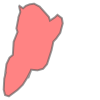

In [ ]:
polygon

In [ ]:
min_x, min_y, max_x, max_y = polygon.bounds

In [ ]:
min_x

24.58576436277328

In [ ]:
min_y

79.92042195805622

In [ ]:
max_x

24.652034788862203

In [ ]:
max_y

80.02439225088594

In [ ]:
# Load the image
image_path = '/content/panna_lat_lon_pts.jpg'
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for red color in HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create masks for red color
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Find contours in the mask
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area to ignore small regions
min_area = 10  # You can adjust this value based on your specific needs
large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Count the number of large red points
num_large_red_points = len(large_contours)

print(f"Number of large red points: {num_large_red_points}")

Number of large red points: 555
